In [70]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [2]:
a = np.array([1,42,18])
b = np.arange(10)
b2 = np.arange(2,5,.5)
c = np.linspace(0,1,11)
d = np.ones(6)
d = np.zeros(5)
e = np.full(5,3)

print(a)
print(b)
print(b2)
print(c)
print(d)
print(e)

[ 1 42 18]
[0 1 2 3 4 5 6 7 8 9]
[2.  2.5 3.  3.5 4.  4.5]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
[0. 0. 0. 0. 0.]
[3 3 3 3 3]


In [5]:
np.concatenate((a,b))

array([ 1, 42, 18,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9])

In [3]:
#créer la même array de dimension 2.
A = np.array([[1,2,3], [4,5,6], [7,8,9]])
B = np.array([1,2,3,4,5,6,7,8,9]).reshape((3,3))

print(A)
print(B)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [6]:
np.vstack((A,a))

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [ 1, 42, 18]])

In [7]:
np.hstack((A,A))

array([[1, 2, 3, 1, 2, 3],
       [4, 5, 6, 4, 5, 6],
       [7, 8, 9, 7, 8, 9]])

In [4]:
np.ones((2,5))

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [8]:
np.dot(A,a)

array([139, 322, 505])

In [10]:
A.sum(axis=0), A.sum(axis=1)

(array([12, 15, 18]), array([ 6, 15, 24]))

## Questions 

In [17]:
#Question 1. — Créer une matrice de taille 8 × 8 contenant des 0 et des 1 à la manière d’un échiquier.

M = np.array([0,1,0,1,0,1,0,1,1,0,1,0,1,0,1,0]*4).reshape((8,8))
M

array([[0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0]])

In [43]:
M = np.arange(1,21).reshape((5,4)).T
print(M)

np.hstack((np.hstack((np.vstack((M[0:3,1:][1:],M[0:3,1:][0:1]))[:,0:1] ,np.vstack((M[0:3,1:][1:],M[0:3,1:][0:1]))[:,3:])), np.vstack((M[0:3,1:][1:],M[0:3,1:][0:1]))[:,1:2]))

[[ 1  5  9 13 17]
 [ 2  6 10 14 18]
 [ 3  7 11 15 19]
 [ 4  8 12 16 20]]


array([[ 6, 18, 10],
       [ 7, 19, 11],
       [ 5, 17,  9]])

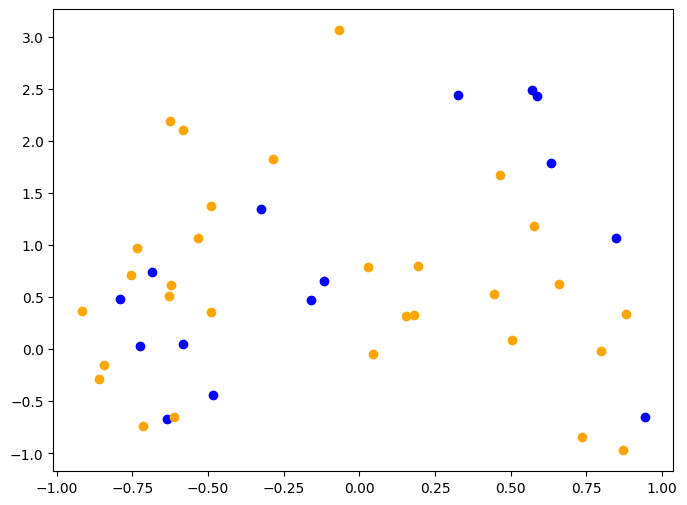

In [58]:
def g(x):
    return (3/2)*x**3 - x**2 - (3/4)*x + 1

x = np.random.uniform(-1,1, size = 15)
eps = np.random.normal(0,1,15)
Y = g(x) + eps

x_test = np.random.uniform(-1,1, size = 30)
eps_test = np.random.normal(0,1,30)
Y_test = g(x_test) + eps_test

plt.figure(figsize=(8,6))
plt.scatter(x, Y, color = 'blue')
plt.scatter(x_test, Y_test, color = 'orange')
plt.show()

In [64]:
f = LinearRegression()
X = x[:,np.newaxis]
X_test = x_test[:,np.newaxis]

f.fit(X,Y)
print("Les coefficients de f sont :", f.coef_, f.intercept_)

Les coefficients de f sont : [0.84350459] 0.8491921348982284


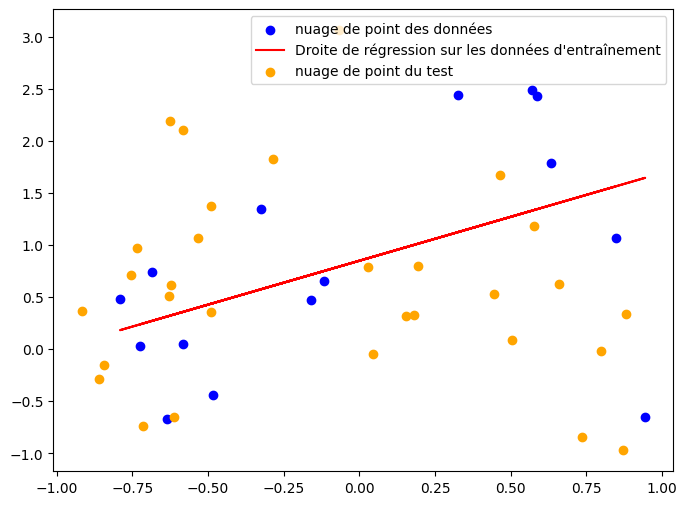

In [68]:
prediction = f.predict(X)
prediction_test = f.predict(X_test)
plt.figure(figsize=(8,6))
plt.scatter(x, Y, color = 'blue', label = "nuage de point des données")
plt.plot(X, prediction, color = 'red', label = "Droite de régression sur les données d'entraînement")
plt.scatter(x_test, Y_test, color = 'orange', label = "nuage de point du test")
plt.legend()
plt.show()

In [69]:
def MSE(Y_predict, Y_true): 
    return np.mean((Y_predict - Y_true)**2)

print("l’erreur moyenne d’apprentissage est : ", MSE(prediction, Y))
print("l’erreur moyenne de test est : ", MSE(prediction_test, Y_test))

l’erreur moyenne d’apprentissage est :  0.8515871506459941
l’erreur moyenne de test est :  1.2666491901574772


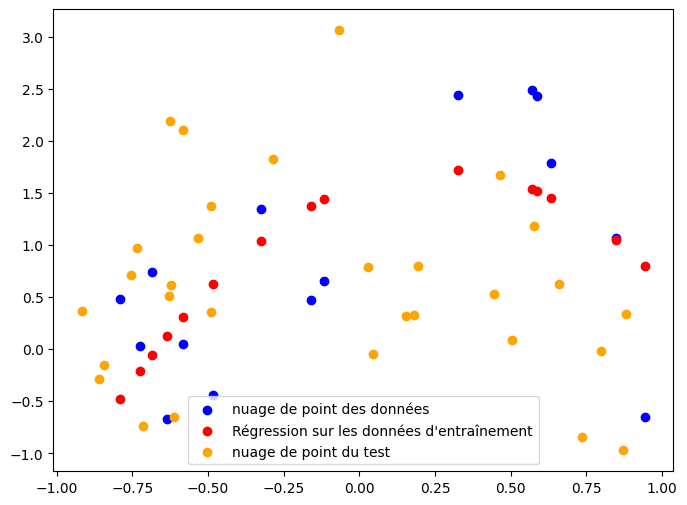

l’erreur moyenne d’apprentissage est :  0.6288141113818685
l’erreur moyenne de test est :  1.3389979854626515


In [80]:
psi = PolynomialFeatures(2,include_bias=False).fit_transform
f2 = LinearRegression()
f2.fit(psi(X), Y)
prediction2 = f2.predict(psi(X))
prediction_test2 = f2.predict(psi(X_test))

plt.figure(figsize=(8,6))
plt.scatter(x, Y, color = 'blue', label = "nuage de point des données")
plt.scatter(X, prediction2, color = 'red', label = "Régression sur les données d'entraînement")
plt.scatter(x_test, Y_test, color = 'orange', label = "nuage de point du test")
plt.legend()
plt.show()

print("l’erreur moyenne d’apprentissage est : ", MSE(prediction2, Y))
print("l’erreur moyenne de test est : ", MSE(prediction_test2, Y_test))

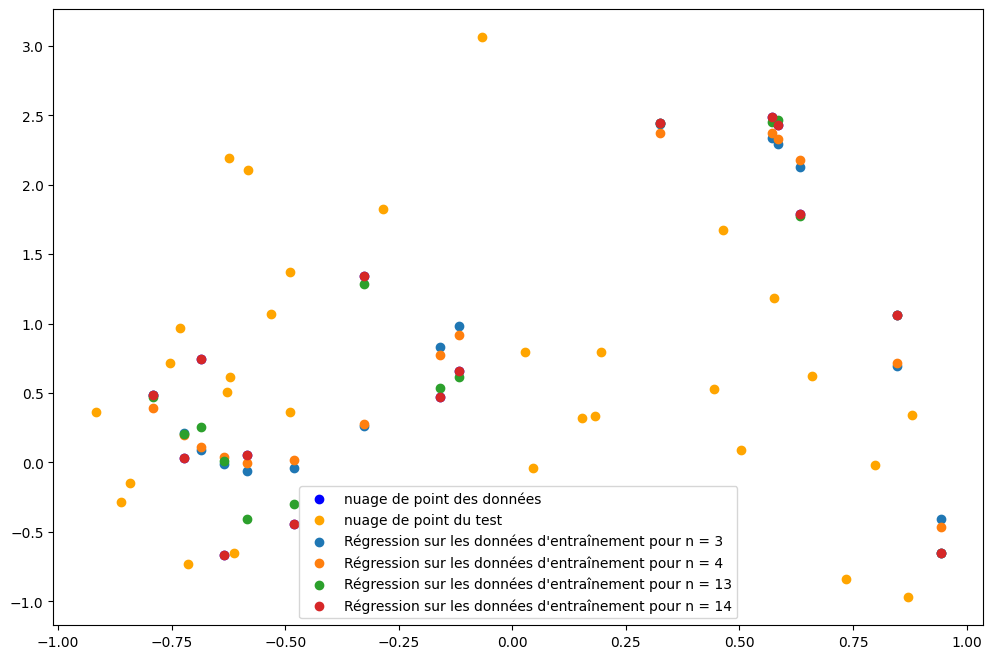

In [83]:
def predicteur(n):
    psi_transform = PolynomialFeatures(n,include_bias=False).fit_transform
    g = LinearRegression()
    g.fit(psi_transform(X), Y)
    pred = g.predict(psi_transform(X))
    pred_test = g.predict(psi_transform(X_test))
    return g, psi_transform

plt.figure(figsize=(12,8))
plt.scatter(x, Y, color = 'blue', label = "nuage de point des données")
plt.scatter(x_test, Y_test, color = 'orange', label = "nuage de point du test")
for n in [3,4,13,14]:
    func, psi = predicteur(n)
    pred = func.predict(psi(X))
    plt.scatter(X, pred, label = f"Régression sur les données d'entraînement pour n = {n}")
plt.legend()
plt.show()

In [84]:
func, psi = predicteur(3)
func.coef_

array([ 3.92322426, -0.98845863, -5.56915612])

In [85]:
func2, psi = predicteur(14)
func2.coef_

array([ 4.99721145e+02,  1.25841686e+03, -9.53401827e+03, -3.49921384e+04,
        6.25159745e+04,  2.84239339e+05, -1.84972444e+05, -1.08262509e+06,
        2.47149527e+05,  2.13579879e+06, -1.05867982e+05, -2.10773670e+06,
       -2.23284369e+04,  8.23129458e+05])

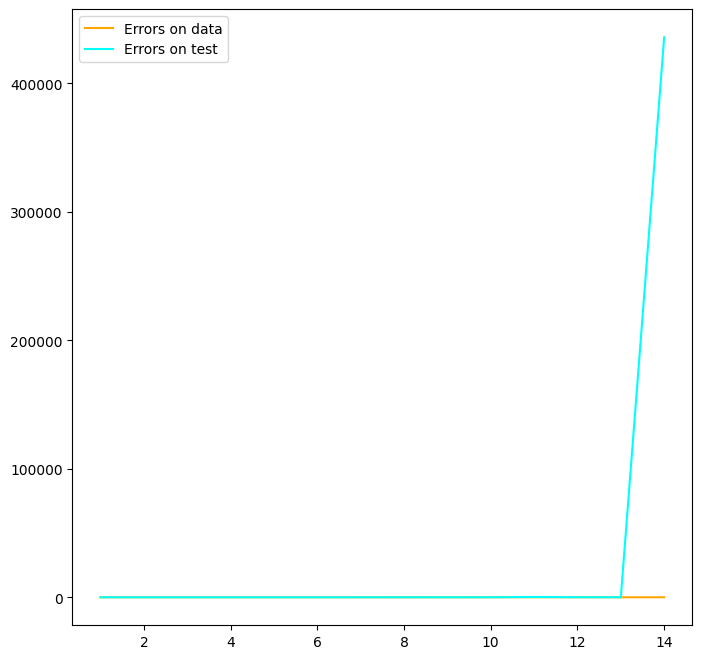

In [91]:
errors = []
errors_test = []
for n in np.arange(14) + 1: 
    func, psi = predicteur(n)
    pred = func.predict(psi(X))
    pred_test = func.predict(psi(X_test))
    errors.append(MSE(pred,Y))
    errors_test.append(MSE(pred_test,Y_test))
plt.figure(figsize=(8,8))
plt.plot(np.arange(14) + 1, errors, color = "orange", label = "Errors on data")
plt.plot(np.arange(14) + 1, errors_test, color = "cyan", label = "Errors on test")
plt.legend()
plt.show()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])